In [1]:
import os, json, sys
sys.path.append('../..')

In [2]:
import numpy as np
from density_lime.kernel_density_exp import KernelDensityExp
from test_kde_2d import TestKDELocal2D

In [3]:
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (6.4*2, 4.8*2)

In [4]:
test = TestKDELocal2D(bandwidth=0.02)

/home/tiago/anaconda3/envs/Tupa/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)


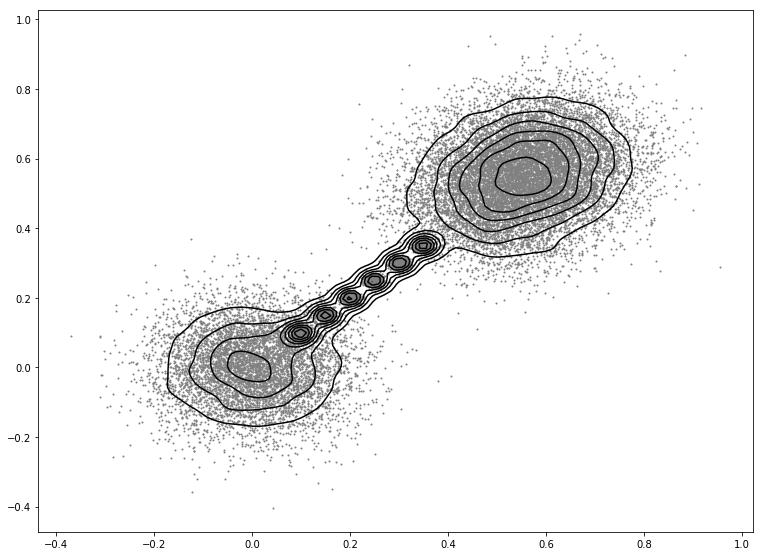

In [5]:
fig, ax = plt.subplots(1)
test.plot_kde(ax)

/home/tiago/anaconda3/envs/Tupa/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)
/home/tiago/anaconda3/envs/Tupa/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)


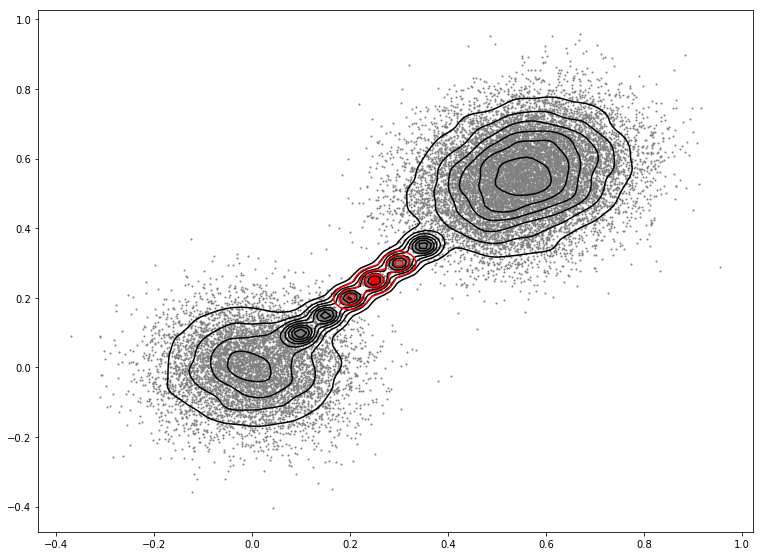

In [6]:
fig, ax = plt.subplots(1)
test.plot_kde(ax)
test.plot_kde_local(x_exp=[[0.25, 0.25]], ax=ax)

/home/tiago/anaconda3/envs/Tupa/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)
/home/tiago/anaconda3/envs/Tupa/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)


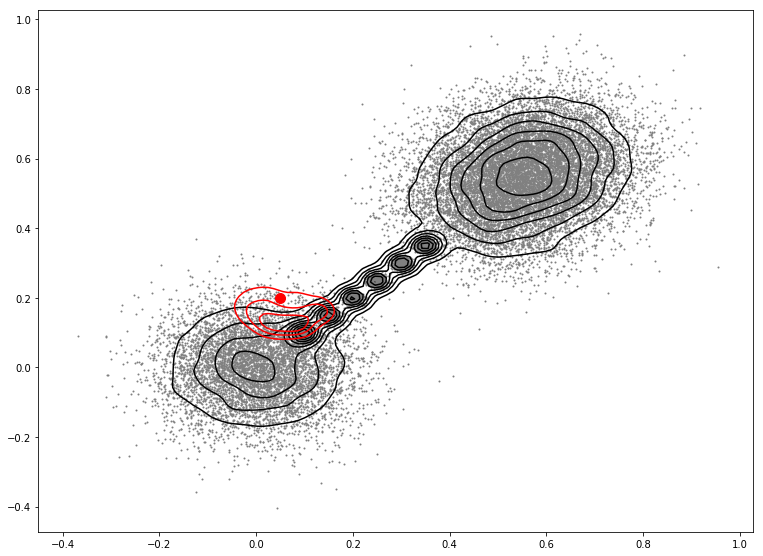

In [7]:
x_exp=[[0.05, 0.2]]
fig, ax = plt.subplots(1)
test.plot_kde(ax)
test.plot_kde_local(x_exp=x_exp, ax=ax)

/home/tiago/anaconda3/envs/Tupa/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)
/home/tiago/anaconda3/envs/Tupa/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)


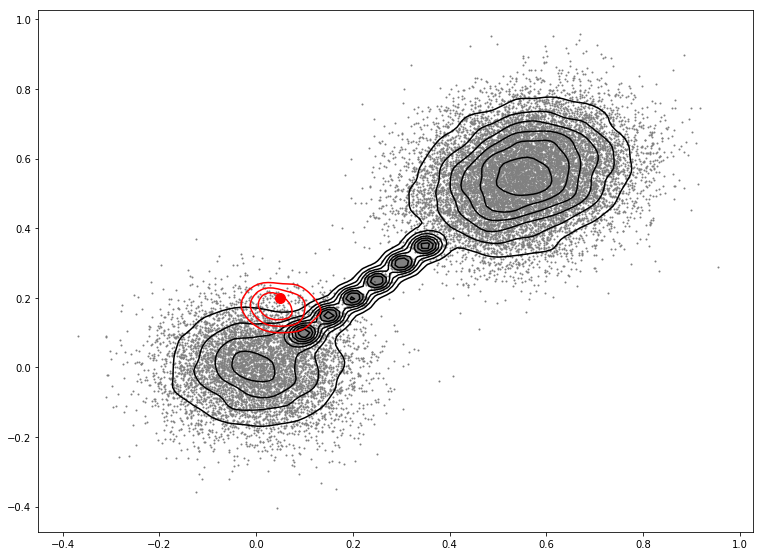

In [8]:
x_exp=[[0.05, 0.2]]
fig, ax = plt.subplots(1)
test.plot_kde(ax)
test.plot_kde_local(x_exp=x_exp, ax=ax, kernel_width=0.04)

In [9]:
from playground.aux.domain import Spiral

In [10]:
spiral = Spiral(error_x=0.4, error_y=0.0)
x_t, y_t = spiral.domain()
x_t.shape

(80000, 2)

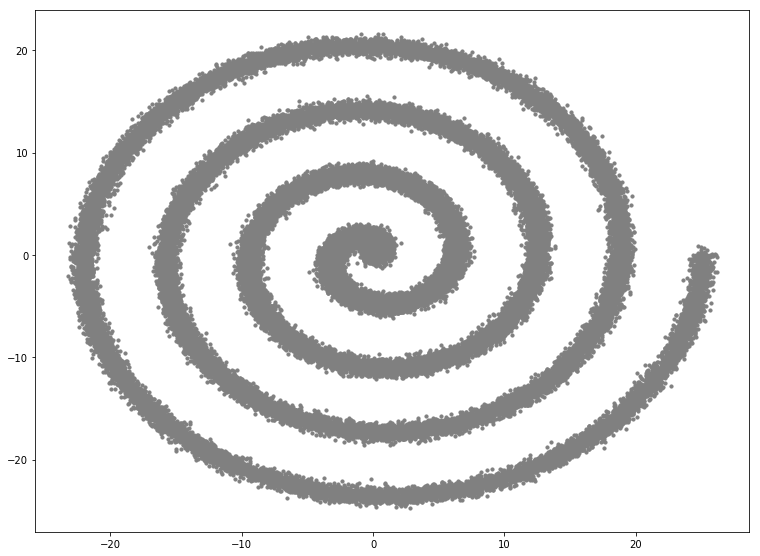

In [11]:
plt1 = plt.scatter(x_t[:, 0], x_t[:, 1], c='gray', s=10)

In [12]:
kde = KernelDensityExp(kernel='gaussian', bandwidth=0.2).fit(x_t)

1.0298711563388485


/home/tiago/anaconda3/envs/Tupa/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


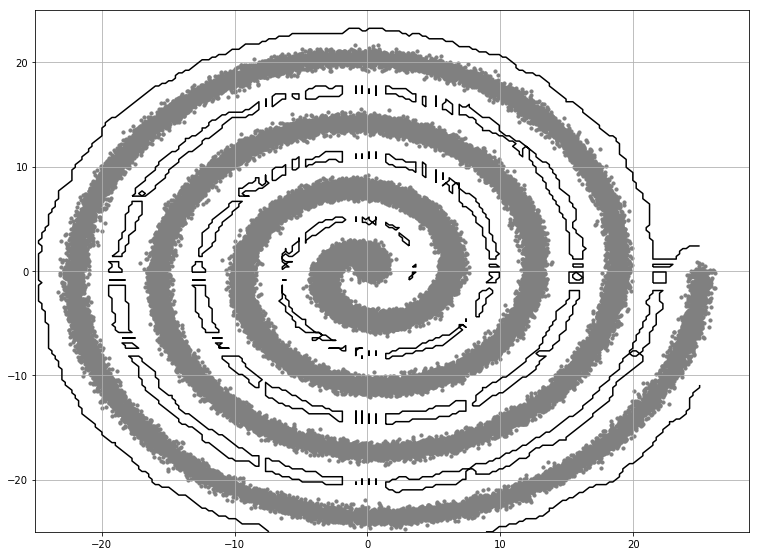

In [16]:
x_exp=[[0.0, 0.0]]
x_exp = np.array(x_exp)
# mean and standard deviation
X = x_t

plt.scatter(X[:, 0], X[:, 1], c='gray', s=10)
N = 200
x = np.linspace(-25.0, 25.0, N)
y = np.linspace(-25.0, 25.0, N)
X, Y = np.meshgrid(x, y)
xy = np.vstack([X.ravel(), Y.ravel()]).T
Z = kde.predict(xy)
Z = np.exp(Z.reshape(N, N))
levels = np.linspace(0.1, Z.max()/5, 15)
print(Z.max())
plt.contour(X, Y, Z,  colors='black', levels=levels)
# plt.contour(X, Y, Z, colors='black')
plt.grid(True, which='both')

0.029433703483864426


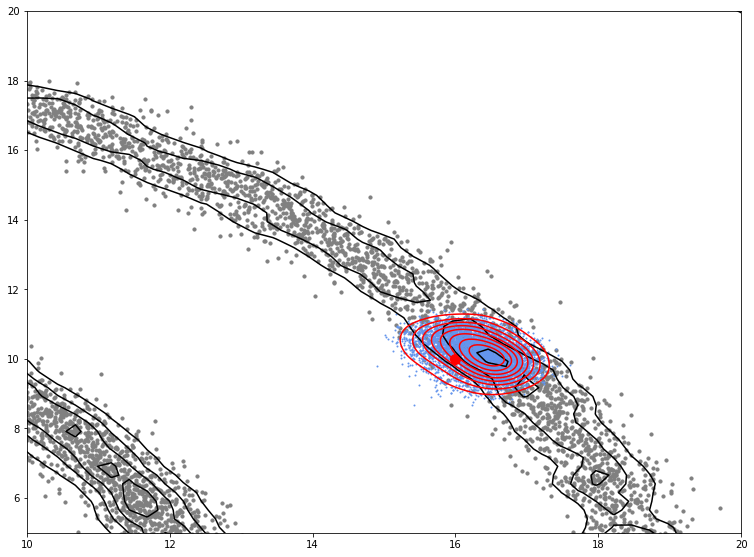

In [14]:
x_exp=[[16.0, 10.0]]
x_exp = np.array(x_exp)
# mean and standard deviation
X = x_t

plt.scatter(X[:, 0], X[:, 1], c='gray', s=10)
N = 200
x = np.linspace(-25.0, 25.0, N)
y = np.linspace(-25.0, 25.0, N)
X, Y = np.meshgrid(x, y)
xy = np.vstack([X.ravel(), Y.ravel()]).T
Z = kde.score_samples(xy)
Z = np.exp(Z.reshape(N, N))
levels = np.linspace(0, Z.max()/3, 15)
print(Z.max())
plt.contour(X, Y, Z, levels=levels, colors='black')
# plt.contour(X, Y, Z, colors='black')

X_sample = kde.sample_radius(x_exp=x_exp, r=1.0, n_samples=5000)
plt.scatter(X_sample[:, 0], X_sample[:, 1], c='cornflowerblue', s=1)

kde_exp = KernelDensityExp(kernel='gaussian', bandwidth=0.2).fit(X_sample)
x = np.linspace(x_exp[0, 0]-2.0, x_exp[0, 0]+2.0, 100)
y = np.linspace(x_exp[0, 1]-2.0, x_exp[0, 1]+2.0, 100)
X, Y = np.meshgrid(x, y)
xy = np.vstack([X.ravel(), Y.ravel()]).T
Z = np.exp(kde_exp.score_samples(xy))
Z = Z.reshape(100, 100)
levels = np.linspace(0, Z.max(), 10)
# plt.contour(X, Y, Z, levels=levels, colors='pink')
plt.contour(X, Y, Z, colors='red', levels=levels)
plt.scatter(x_exp[:, 0], x_exp[:, 1], c='red', s=100)
plt.xlim([10, 20])
plt.ylim([5, 20])
plt.show()